# Analysing Sales Data and finding some of the insights in the data

Project Title : To demonstrate analytics skills by analyzing a dataset, extracting meaningful insights, and presenting them with visualizations and statistical interpretations.

"Analyze customer purchasing behavior to identify the most profitable products, regions, and customer segments."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the csv file, as the file consists of data from different source so 
data = pd.read_csv("sales_data_sample.csv",encoding="latin1") 

# we are taking sample_data of 1000 datasets for our overall analysis of the project
sample_data = data.head(1000)
sample_data

sample_data = pd.DataFrame(sample_data)
sample_data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# lets start cleaning the data

In [2]:

sample_data.isnull().sum()

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
ORDERLINENUMBER       0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
PHONE                 0
ADDRESSLINE1          0
ADDRESSLINE2        889
CITY                  0
STATE               507
POSTALCODE           41
COUNTRY               0
TERRITORY           395
CONTACTLASTNAME       0
CONTACTFIRSTNAME      0
DEALSIZE              0
dtype: int64

In [3]:
# the data in AddressLine 2 is mostly null so we are deleting it all
sample_data.drop("ADDRESSLINE2",axis=1,inplace=True)

In [13]:
sample_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10185,28,100.00,9,3442.04,11/14/2003 0:00,Shipped,4,11,2003,...,5085559555,4575 Hillside Dr.,New Bedford,MA,50553,USA,NaN,Tam,Wing C,Medium
996,10196,49,100.00,1,6893.81,11/26/2003 0:00,Shipped,4,11,2003,...,2035559545,567 North Pendale Street,New Haven,CT,97823,USA,NaN,Murphy,Leslie,Medium
997,10208,24,100.00,9,2622.48,1/2/2004 0:00,Shipped,1,1,2004,...,78.32.5555,"2, rue du Commerce",Lyon,NaN,69004,France,EMEA,Saveley,Mary,Small
998,10221,33,100.00,3,4417.38,2/18/2004 0:00,Shipped,1,2,2004,...,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,NaN,B-1180,Belgium,EMEA,Dewey,Catherine,Medium


In [4]:
# now state has 507 null values we will handle it by filling most frequest state that ordered items
sample_data["STATE"].value_counts()
sample_data["STATE"].fillna("Not known",inplace=True)
sample_data

C:\Users\smdta\AppData\Local\Temp\ipykernel_4284\2986182085.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_data["STATE"].fillna("Not known",inplace=True)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,Not known,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Not known,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10185,28,100.00,9,3442.04,11/14/2003 0:00,Shipped,4,11,2003,...,5085559555,4575 Hillside Dr.,New Bedford,MA,50553,USA,NaN,Tam,Wing C,Medium
996,10196,49,100.00,1,6893.81,11/26/2003 0:00,Shipped,4,11,2003,...,2035559545,567 North Pendale Street,New Haven,CT,97823,USA,NaN,Murphy,Leslie,Medium
997,10208,24,100.00,9,2622.48,1/2/2004 0:00,Shipped,1,1,2004,...,78.32.5555,"2, rue du Commerce",Lyon,Not known,69004,France,EMEA,Saveley,Mary,Small
998,10221,33,100.00,3,4417.38,2/18/2004 0:00,Shipped,1,2,2004,...,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,Not known,B-1180,Belgium,EMEA,Dewey,Catherine,Medium


In [21]:
# similarly fill na for other columns also
sample_data.fillna("Not Known",inplace=True)
sample_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Not Known,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,Not known,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Not known,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,Not Known,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,Not Known,USA,Not Known,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10185,28,100.00,9,3442.04,11/14/2003 0:00,Shipped,4,11,2003,...,5085559555,4575 Hillside Dr.,New Bedford,MA,50553,USA,Not Known,Tam,Wing C,Medium
996,10196,49,100.00,1,6893.81,11/26/2003 0:00,Shipped,4,11,2003,...,2035559545,567 North Pendale Street,New Haven,CT,97823,USA,Not Known,Murphy,Leslie,Medium
997,10208,24,100.00,9,2622.48,1/2/2004 0:00,Shipped,1,1,2004,...,78.32.5555,"2, rue du Commerce",Lyon,Not known,69004,France,EMEA,Saveley,Mary,Small
998,10221,33,100.00,3,4417.38,2/18/2004 0:00,Shipped,1,2,2004,...,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,Not known,B-1180,Belgium,EMEA,Dewey,Catherine,Medium


In [5]:
# Info about the structure of dataFrame, and datatype used
print(sample_data.info())

# Finding Statistical Summary of data
# print(sample_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       1000 non-null   int64  
 1   QUANTITYORDERED   1000 non-null   int64  
 2   PRICEEACH         1000 non-null   float64
 3   ORDERLINENUMBER   1000 non-null   int64  
 4   SALES             1000 non-null   float64
 5   ORDERDATE         1000 non-null   object 
 6   STATUS            1000 non-null   object 
 7   QTR_ID            1000 non-null   int64  
 8   MONTH_ID          1000 non-null   int64  
 9   YEAR_ID           1000 non-null   int64  
 10  PRODUCTLINE       1000 non-null   object 
 11  MSRP              1000 non-null   int64  
 12  PRODUCTCODE       1000 non-null   object 
 13  CUSTOMERNAME      1000 non-null   object 
 14  PHONE             1000 non-null   object 
 15  ADDRESSLINE1      1000 non-null   object 
 16  CITY              1000 non-null   object 
 

In [8]:
sample_data["PRODUCTCODE"].value_counts()

PRODUCTCODE
S10_1949    28
S10_4962    28
S12_1666    28
S18_1097    28
S18_2432    28
S18_1129    27
S10_4757    27
S18_3136    27
S18_2957    27
S18_1984    27
S12_4473    27
S18_2949    27
S18_2238    27
S10_1678    26
S10_2016    26
S18_3029    26
S10_4698    26
S18_1367    26
S18_1662    26
S12_3891    26
S12_4675    26
S12_2823    26
S12_1108    26
S18_2319    26
S18_2795    26
S18_2625    26
S18_1889    26
S18_1342    26
S12_1099    25
S12_3148    25
S12_3990    25
S18_2870    25
S18_1589    25
S12_3380    25
S18_2325    25
S18_2581    23
S18_1749    22
S18_2248    22
S18_3140    12
Name: count, dtype: int64

In [6]:
# we will find the top sales product by product code
top_products = sample_data.groupby("PRODUCTCODE")["SALES"].sum().sort_values(ascending=False).head(10)
print(top_products)


PRODUCTCODE
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
S12_3891    145332.04
S12_2823    140006.16
S18_1662    139421.97
S12_1099    137177.01
S12_1666    136692.72
S18_1129    129757.49
Name: SALES, dtype: float64


# Lets see the sales with city,state,country, territory

In [7]:
top_sales_city = sample_data.groupby("CITY")["SALES"].sum().sort_values(ascending=False).head(10)
print(top_sales_city)

CITY
Madrid           362661.34
San Rafael       265865.24
NYC              234438.90
San Francisco    141151.66
Singapore        140605.82
Paris            105485.98
Melbourne        104253.45
Nashua            85566.92
Salzburg          82166.66
New Bedford       79056.32
Name: SALES, dtype: float64


In [8]:
top_sales_state = sample_data.groupby("STATE")["SALES"].sum().sort_values(ascending=False).head(10)
print(top_sales_state)

STATE
Not known    2139308.19
CA            697707.15
NY            262241.37
MA            260359.73
PA            141216.16
NSW           134381.11
Victoria      130390.94
CT            112253.52
NH             85566.92
BC             47332.04
Name: SALES, dtype: float64


In [37]:
top_sales_country = sample_data.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False).head(10)
print(top_sales_country)

COUNTRY
USA          1616941.11
France        452240.70
Spain         394806.18
Australia     302880.96
Italy         171407.92
UK            169166.30
Singapore     140605.82
Norway        139702.53
Finland       128762.33
Denmark       115478.71
Name: SALES, dtype: float64


In [9]:
# overall region wise sales
top_sales_state_c = sample_data.groupby(["CITY","STATE","COUNTRY"])["SALES"].sum().sort_values(ascending=False).head(10)
print(top_sales_state_c)

CITY           STATE      COUNTRY  
Madrid         Not known  Spain        362661.34
San Rafael     CA         USA          265865.24
NYC            NY         USA          234438.90
San Francisco  CA         USA          141151.66
Singapore      Not known  Singapore    140605.82
Paris          Not known  France       105485.98
Melbourne      Victoria   Australia    104253.45
Nashua         NH         USA           85566.92
Salzburg       Not known  Austria       82166.66
New Bedford    MA         USA           79056.32
Name: SALES, dtype: float64


In [39]:
sample_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Not Known,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,Not known,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Not known,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,Not Known,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,Not Known,USA,Not Known,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10185,28,100.00,9,3442.04,11/14/2003 0:00,Shipped,4,11,2003,...,5085559555,4575 Hillside Dr.,New Bedford,MA,50553,USA,Not Known,Tam,Wing C,Medium
996,10196,49,100.00,1,6893.81,11/26/2003 0:00,Shipped,4,11,2003,...,2035559545,567 North Pendale Street,New Haven,CT,97823,USA,Not Known,Murphy,Leslie,Medium
997,10208,24,100.00,9,2622.48,1/2/2004 0:00,Shipped,1,1,2004,...,78.32.5555,"2, rue du Commerce",Lyon,Not known,69004,France,EMEA,Saveley,Mary,Small
998,10221,33,100.00,3,4417.38,2/18/2004 0:00,Shipped,1,2,2004,...,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,Not known,B-1180,Belgium,EMEA,Dewey,Catherine,Medium


In [10]:
# which product code is highest ordered

top_PRODUCT_QUANTITY = sample_data.groupby("PRODUCTCODE")["QUANTITYORDERED"].sum().sort_values(ascending=False)
print(top_PRODUCT_QUANTITY)

PRODUCTCODE
S12_4473    1024
S18_1097     999
S18_2432     998
S18_1342     997
S18_2319     993
S18_2949     991
S12_1108     973
S12_1666     972
S18_2238     966
S12_2823     964
S12_4675     964
S10_1949     961
S10_4757     952
S18_1889     951
S18_1129     947
S10_1678     944
S18_1662     940
S18_2957     932
S10_4962     932
S10_2016     928
S10_4698     921
S12_3891     921
S18_1984     917
S18_1589     914
S12_3148     898
S18_1367     890
S18_3136     873
S18_2625     872
S18_3029     872
S18_2870     855
S12_3380     853
S12_1099     838
S18_2325     828
S18_1749     802
S12_3990     800
S18_2795     789
S18_2581     746
S18_2248     743
S18_3140     389
Name: QUANTITYORDERED, dtype: int64


In [11]:
sample_data["QUANTITYORDERED"].sum()

np.int64(35049)

PRODUCTCODE
S10_1949    191073.03
S10_4698    170401.07
S12_1108    168585.32
S18_2238    154623.95
S12_3891    145332.04
S12_2823    140006.16
S18_1662    139421.97
S12_1099    137177.01
S12_1666    136692.72
S18_1129    129757.49
Name: SALES, dtype: float64


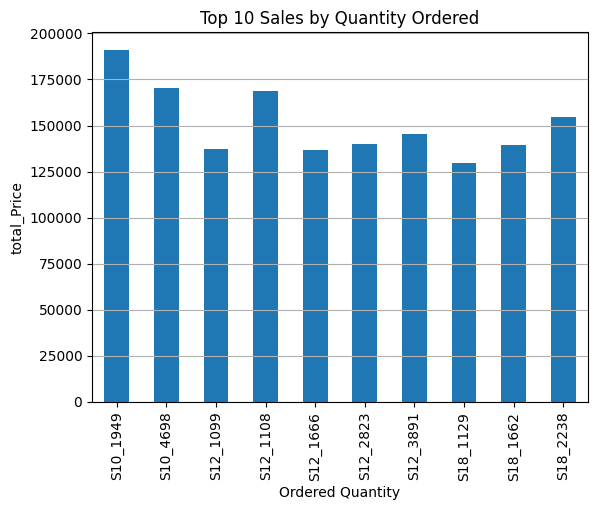

In [21]:
top_sales_s = sample_data.groupby("PRODUCTCODE")["SALES"].sum().sort_values(ascending=False).head(10)
print(top_sales_s)

# sorting indexes
top_sales_sorted = top_sales_s.sort_index()

#making a bar chart
top_sales_sorted.plot(kind="bar")
plt.title("Top 10 Sales by Quantity Ordered")
plt.xlabel("Ordered Quantity")
plt.ylabel("total_Price")
plt.grid(axis="y")
plt.show()


MONTH_ID
11    882485.35
10    506046.40
5     403914.84
1     344234.33
2     310299.11
4     282593.40
8     281801.12
3     280421.10
9     257234.57
12    242343.25
7     238725.96
6     194234.21
Name: SALES, dtype: float64


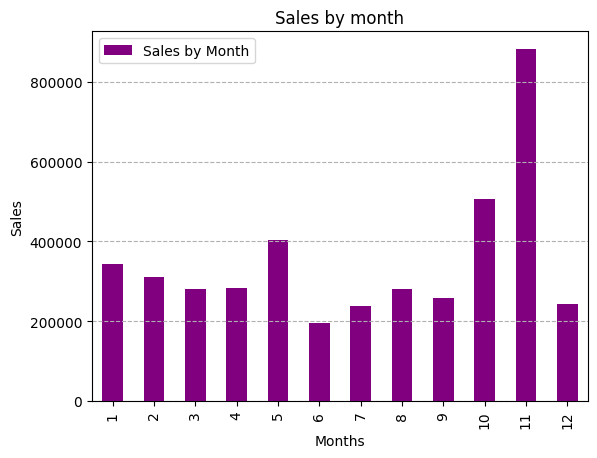

In [13]:
top_sales_month = sample_data.groupby("MONTH_ID")["SALES"].sum().sort_values(ascending=False)
print(top_sales_month)

top_sales_month_sorted = top_sales_month.sort_index()
top_sales_month_sorted.plot(kind="bar",color="purple",label="Sales by Month")
plt.title("Sales by month")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.grid(axis="y",linestyle="--")
plt.legend()
plt.show()


In [56]:
sample_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Not Known,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,Reims,Not known,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Not known,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,Not Known,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,San Francisco,CA,Not Known,USA,Not Known,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10185,28,100.00,9,3442.04,11/14/2003 0:00,Shipped,4,11,2003,...,5085559555,4575 Hillside Dr.,New Bedford,MA,50553,USA,Not Known,Tam,Wing C,Medium
996,10196,49,100.00,1,6893.81,11/26/2003 0:00,Shipped,4,11,2003,...,2035559545,567 North Pendale Street,New Haven,CT,97823,USA,Not Known,Murphy,Leslie,Medium
997,10208,24,100.00,9,2622.48,1/2/2004 0:00,Shipped,1,1,2004,...,78.32.5555,"2, rue du Commerce",Lyon,Not known,69004,France,EMEA,Saveley,Mary,Small
998,10221,33,100.00,3,4417.38,2/18/2004 0:00,Shipped,1,2,2004,...,(02) 5554 67,Rue Joseph-Bens 532,Bruxelles,Not known,B-1180,Belgium,EMEA,Dewey,Catherine,Medium


ORDERDATE
2003-01     66866.57
2003-02     53228.02
2003-03     86100.80
2003-04     76715.98
2003-05     97456.03
2003-06     62758.60
2003-07    103364.02
2003-08     83674.43
2003-09    130515.81
2003-10    257666.09
2003-11    480093.35
2003-12    132704.53
2004-01    142756.19
2004-02    130301.18
2004-03     93653.08
2004-04     92020.21
2004-05     95510.01
2004-06    131475.61
2004-07    135361.94
2004-08    198126.69
2004-09    126718.76
2004-10    248380.31
2004-11    402392.00
2004-12    109638.72
2005-01    134611.57
2005-02    126769.91
2005-03    100667.22
2005-04    113857.21
2005-05    210948.80
Freq: M, Name: SALES, dtype: float64


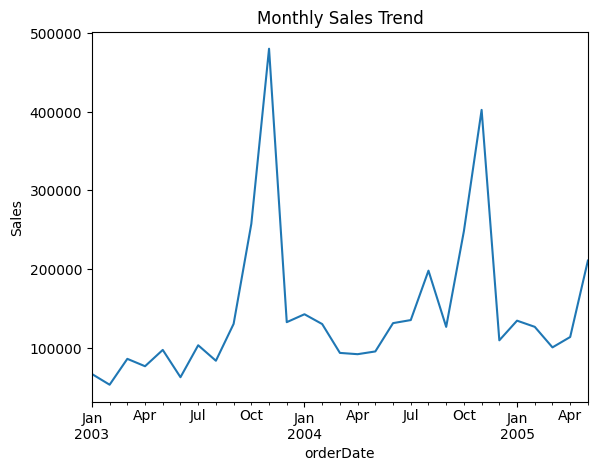

In [14]:
#Time trend analysis

sample_data["ORDERDATE"] = pd.to_datetime(sample_data["ORDERDATE"])
sales_trend = sample_data.groupby(sample_data["ORDERDATE"].dt.to_period("M"))["SALES"].sum()
print(sales_trend)
sales_trend.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("orderDate")
plt.ylabel("Sales")
plt.show()

In [80]:
# creating professional Visualization using plotly

import plotly.express as px
#sales by productID category

fig = px.bar(sample_data,x = "PRODUCTCODE",y="SALES",title="Sales by ProductId  category",color_discrete_sequence=["red"])
fig.show()

In [15]:
sample_data["SALES"].sum()

np.float64(4224333.64)

In [68]:
sample_data["SALES"].sort_values(ascending=False).head(10)

598    14082.80
744    12536.50
53     12001.00
104    11886.60
44     11623.70
188    11279.20
30     10993.50
198    10606.20
43     10172.70
90      9774.03
Name: SALES, dtype: float64

In [70]:
sample_data.iloc[589]

ORDERNUMBER                       10241
QUANTITYORDERED                      41
PRICEEACH                         100.0
ORDERLINENUMBER                       2
SALES                            7597.3
ORDERDATE           2004-04-13 00:00:00
STATUS                          Shipped
QTR_ID                                2
MONTH_ID                              4
YEAR_ID                            2004
PRODUCTLINE                Vintage Cars
MSRP                                170
PRODUCTCODE                    S18_1749
CUSTOMERNAME                Mini Caravy
PHONE                        88.60.1555
ADDRESSLINE1           24, place Kluber
CITY                         Strasbourg
STATE                         Not known
POSTALCODE                        67000
COUNTRY                          France
TERRITORY                          EMEA
CONTACTLASTNAME                 Citeaux
CONTACTFIRSTNAME             Frederique
DEALSIZE                          Large
Name: 589, dtype: object

In [76]:
sample_data[sample_data["PRODUCTCODE"] == "S10_1949"]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
26,10103,26,100.0,11,5404.62,2003-01-29,Shipped,1,1,2003,...,07-98 9555,Erling Skakkes gate 78,Stavern,Not known,4110,Norway,EMEA,Bergulfsen,Jonas,Medium
27,10112,29,100.0,1,7209.11,2003-03-24,Shipped,1,3,2003,...,0921-12 3555,Berguvsvgen 8,Lule,Not known,S-958 22,Sweden,EMEA,Berglund,Christina,Large
28,10126,38,100.0,11,7329.06,2003-05-28,Shipped,2,5,2003,...,(91) 555 22 82,"C/ Araquil, 67",Madrid,Not known,28023,Spain,EMEA,Sommer,Mart¡n,Large
29,10140,37,100.0,11,7374.10,2003-07-24,Shipped,3,7,2003,...,6505556809,9408 Furth Circle,Burlingame,CA,94217,USA,Not Known,Hirano,Juri,Large
30,10150,45,100.0,8,10993.50,2003-09-19,Shipped,3,9,2003,...,+65 221 7555,"Bronz Sok., Bronz Apt. 3/6 Tesvikiye",Singapore,Not known,79903,Singapore,Japan,Natividad,Eric,Large
31,10163,21,100.0,1,4860.24,2003-10-20,Shipped,4,10,2003,...,2125558493,5905 Pompton St.,NYC,NY,10022,USA,Not Known,Hernandez,Maria,Medium
32,10174,34,100.0,4,8014.82,2003-11-06,Shipped,4,11,2003,...,61-7-3844-6555,31 Duncan St. West End,South Brisbane,Queensland,4101,Australia,APAC,Calaghan,Tony,Large
33,10183,23,100.0,8,5372.57,2003-11-13,Shipped,4,11,2003,...,2155554695,782 First Street,Philadelphia,PA,71270,USA,Not Known,Cervantes,Francisca,Medium
34,10194,42,100.0,11,7290.36,2003-11-25,Shipped,4,11,2003,...,78.32.5555,"2, rue du Commerce",Lyon,Not known,69004,France,EMEA,Saveley,Mary,Large
35,10206,47,100.0,6,9064.89,2003-12-05,Shipped,4,12,2003,...,(604) 555-3392,1900 Oak St.,Vancouver,BC,V3F 2K1,Canada,Not Known,Tannamuri,Yoshi,Large


THIS HAS THE HIGHEST SALES THAT IS PRODUCT ID IS "S10_1949"

In [19]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
